In [402]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [403]:
def first(lab3):
    ## Trabsformation number 1: standardize column headers
    cols=[]
    for i in range (len(lab3.columns)):
        cols.append(lab3.columns[i].lower())
    lab3.columns = cols
    
    ## Transformation number 2: deal with NanN values
    
    # Scenario 1: delete a row if they have all NaN 
    lab3=lab3.dropna(how='all')
    lab3.reset_index(drop=True,inplace=True)
    
    #Scenario 2: Fill in vehicle class unknown values
    lab3['vehicle class']= lab3['vehicle class'].fillna("Unknown")
    
    #Scenario 3: Fill in vhicle size unknown values
    lab3['vehicle size']= lab3['vehicle size'].fillna("Unknown")
    
    #Scenario 4: Fill in vehicle type unknwon values
    lab3['vehicle type']= lab3['vehicle type'].fillna("Unknown")
    
    #Scnario 5: Fill in NaN opn complaints with median number
    med_16=lab3['number of open complaints'].median()
    lab3['number of open complaints']=lab3['number of open complaints'].fillna(med_16)
    
    #Scenario 6: Fill in NaN months since last claim with median value
    med_14=lab3['months since last claim'].median()
    lab3['months since last claim']=lab3['months since last claim'].fillna(med_14)
    
    #Scnario 7: Fill all of columns with NaN data with Unknown
    lab3.fillna("Unknown",inplace=True)
    
    
    ## Transformation number 3: Extract only data for the first quarter
    import time
    from datetime import date
    
    lab3['effective to date']=pd.to_datetime(lab3['effective to date'],errors='coerce')
    
    
    return lab3


In [404]:
bun=pd.read_csv('/Users/macbook/Documents/IRON  HACK/Day3_Pandas_Date format/marketing_customer_analysis.csv')

In [405]:
lab5 = first(bun)

In [406]:
lab5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed: 0                     10910 non-null  int64         
 1   customer                       10910 non-null  object        
 2   state                          10910 non-null  object        
 3   customer lifetime value        10910 non-null  float64       
 4   response                       10910 non-null  object        
 5   coverage                       10910 non-null  object        
 6   education                      10910 non-null  object        
 7   effective to date              10910 non-null  datetime64[ns]
 8   employmentstatus               10910 non-null  object        
 9   gender                         10910 non-null  object        
 10  income                         10910 non-null  int64         
 11  location code  

In [407]:
lab5.head(3)

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Unknown
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Unknown
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A


## 03 - Cleaning/Wrangling/EDA

### * Split categorical Features and Numerical Features.

In [408]:
y=lab5['total claim amount']

In [409]:
X=lab5.drop(['customer','unnamed: 0','location code','policy'],axis=1)

In [410]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          10910 non-null  object        
 1   customer lifetime value        10910 non-null  float64       
 2   response                       10910 non-null  object        
 3   coverage                       10910 non-null  object        
 4   education                      10910 non-null  object        
 5   effective to date              10910 non-null  datetime64[ns]
 6   employmentstatus               10910 non-null  object        
 7   gender                         10910 non-null  object        
 8   income                         10910 non-null  int64         
 9   marital status                 10910 non-null  object        
 10  monthly premium auto           10910 non-null  int64         
 11  months since la

In [411]:
X_num=X._get_numeric_data()
X_num.shape

(10910, 8)

In [412]:
X_cat=X.select_dtypes('object')
X_cat.shape

(10910, 13)

### Explore visually both sets of features, to identify next steps.

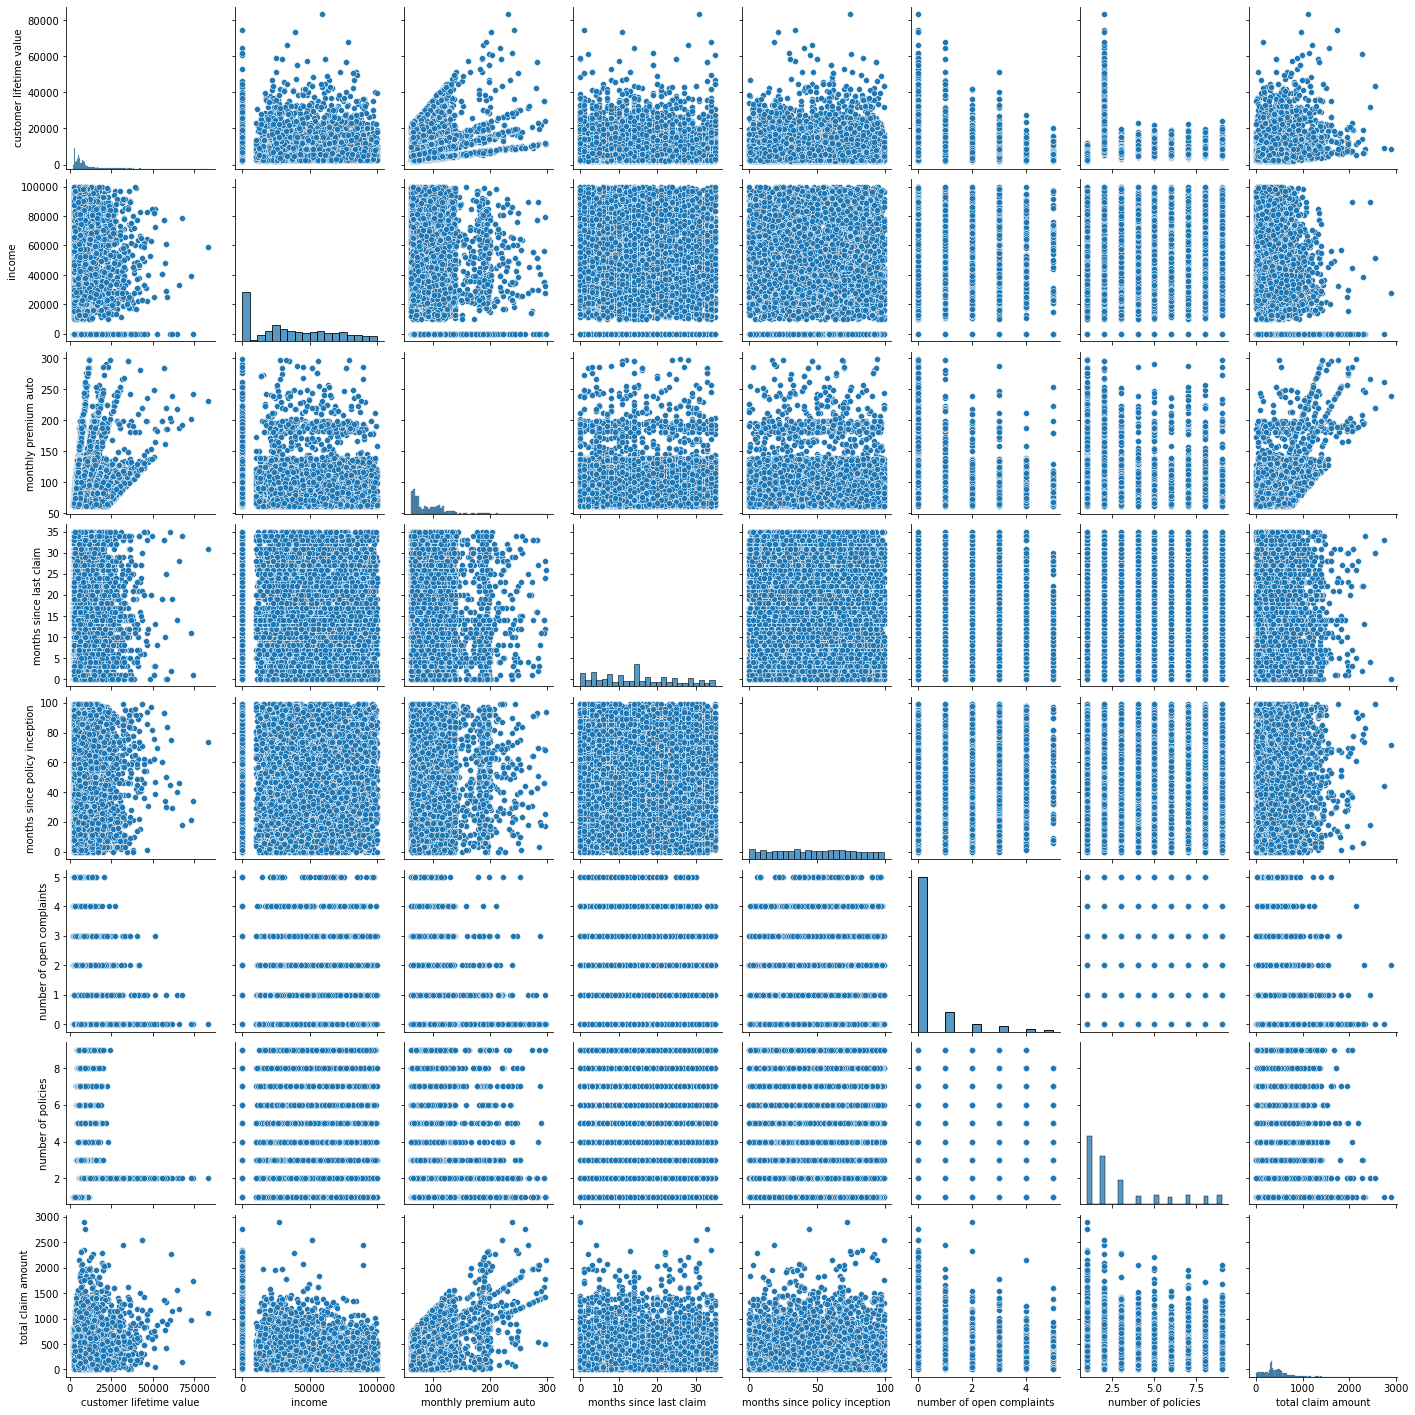

In [413]:
sns.pairplot(X_num);

In [414]:
X_num = X_num.drop(['total claim amount'],axis=1)

In [415]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat)
X_encoded=encoder.transform(X_cat).toarray()
X_encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [416]:
X_encoded.shape

(10910, 38)

In [417]:
X_dummies=pd.get_dummies(X_cat, drop_first=True)

In [418]:
X_dummies.shape

(10910, 38)

## 04 - Pre-Processing Data

#### Dealing with outliers. Normalization - ie use chosen scaler to transform selected columns into normal distribution as needed for linear regression model. Propose: MinMax scaler on 'effective_to_date' and standard scaler on numerical columns.

In [419]:
iqr=np.percentile(X_num['customer lifetime value'],75)-np.percentile(X_num['customer lifetime value'],25)
iqr

4978.326024

In [420]:
upper_limit=np.percentile(X_num['customer lifetime value'],75)+1.5*iqr
lower_limit=np.percentile(X_num['customer lifetime value'],25)-1.5*iqr
print (upper_limit, lower_limit)

16460.268173 -3453.035923


In [421]:
data_exc_out=X_num[(X_num['customer lifetime value']>lower_limit)&(X_num['customer lifetime value']<upper_limit)]

<AxesSubplot:>

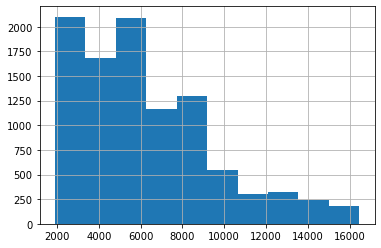

In [422]:
data_exc_out['customer lifetime value'].hist()

In [423]:
def log_transform_clean(x):
    x=np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0
X_num['monthly premium auto']=list(map(log_transform_clean,lab5['monthly premium auto']))

<AxesSubplot:>

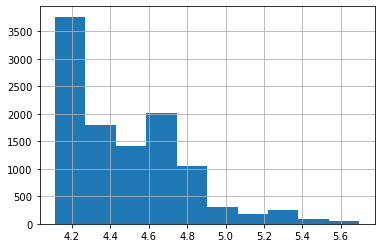

In [424]:
X_num['monthly premium auto'].hist()

In [425]:
X_num.shape

(10910, 7)

In [426]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer lifetime value        10910 non-null  float64
 1   income                         10910 non-null  int64  
 2   monthly premium auto           10910 non-null  float64
 3   months since last claim        10910 non-null  float64
 4   months since policy inception  10910 non-null  int64  
 5   number of open complaints      10910 non-null  float64
 6   number of policies             10910 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 596.8 KB


In [427]:
X_cat.shape

(10910, 13)

### Bring categorical and numerical columns back together using pd.concat.

In [428]:
lab5_final=pd.concat((X_num,X_dummies),axis=1)

In [429]:
lab5_final.shape

(10910, 45)

In [430]:
lab5_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer lifetime value         10910 non-null  float64
 1   income                          10910 non-null  int64  
 2   monthly premium auto            10910 non-null  float64
 3   months since last claim         10910 non-null  float64
 4   months since policy inception   10910 non-null  int64  
 5   number of open complaints       10910 non-null  float64
 6   number of policies              10910 non-null  int64  
 7   state_California                10910 non-null  uint8  
 8   state_Nevada                    10910 non-null  uint8  
 9   state_Oregon                    10910 non-null  uint8  
 10  state_Unknown                   10910 non-null  uint8  
 11  state_Washington                10910 non-null  uint8  
 12  response_Unknown                


### Define X and y, the y value you are seeking to predict is claim amount.
### Splitting into train set and test dataset using random state, eg 80%:20% .

In [431]:
X_train,X_test,y_train,y_test=train_test_split(lab5_final,y,test_size=0.2, random_state=80)

## Modeling
## Apply linear regression model from sklearn.linear_model.

## Fit over your train data and predict against X test.

In [432]:
lm=linear_model.LinearRegression() #configure model 
model=lm.fit(X_train,y_train)

In [433]:
preds=lm.predict(X_test)

In [434]:
preds

array([1024.22357668,  300.78195062,  225.64222186, ...,  551.49086799,
        465.96076595,  608.11032944])

## 06 - Model Validation
#You should gather appropriate metrics to evaluate model accuracy over y_test- such as : R2. MSE. RMSE. MAE.

In [435]:
r2_score(y_test,preds)

0.5623598473179703

In [436]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_true = y_test
y_pred = preds
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)

In [437]:
mse

40106.90528322236

In [438]:
rmse

200.26708487223345

In [439]:
mae

141.24717501826493

## 07 - Reporting

In [ ]:
#look at r2: 56% of the model predictions are correct
# however mse, rmse, mae show a big value which can be indicated that it is not a good predict model.
